In [44]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/EVA_MiLab_Hackathon

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/EVA_MiLab_Hackathon
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
!pip install swig
!pip install "gymnasium[box2d]"

[autoreload of agents.cnn_dqn failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.11/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/imp.py", line 315, in reload
    return importlib.reload(module)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/gdrive/MyDrive/EVA_MiLab_Hackathon/agents/cnn_dqn.py", line 9, in <module>
    from ..utils.memory import ReplayBuffer
ImportError: attempted relative 

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unloc

In [97]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [100]:
import gymnasium as gym
import numpy as np
import torch
from matplotlib import pyplot as plt
from agents.cnn_dqn import CNN_DQN_Agent

# def preprocess_image(state):
#     """Converts RGB image to grayscale and resizes"""
#     import cv2
#     gray = cv2.cvtColor(state, cv2.COLOR_RGB2GRAY)
#     gray = cv2.resize(gray, (96, 96))
#     return np.expand_dims(gray, axis=0)  # Add channel dim

def train_agent(episodes=500):
    env = gym.make("CarRacing-v3", render_mode="rgb_array", lap_complete_percent=0.95, domain_randomize=False, continuous=False)

    agent = CNN_DQN_Agent(input_shape=env.observation_space.shape, num_actions=env.action_space.n)
    agent.load_checkpoint()



    for episode in range(episodes):
        state, info = env.reset()
        state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
        # state = preprocess_image(state)
        total_reward = 0
        done = False

        while not done:
            action = agent.select_action(state)
            print(f"Action: {action}")
            next_state, reward, done, _, _ = env.step(action)
            # next_state = preprocess_image(next_state)

            agent.store_transition(state, action, reward, next_state, done)
            agent.train_step()
            state = next_state
            total_reward += reward

        agent.log_reward(episode, total_reward)

        if episode % 50 == 0:
            agent.save_checkpoint(episode)

        print(f"Episode {episode}: Total Reward: {total_reward}")

    env.close()




In [101]:
train_agent()

TypeError: Input image tensor permitted channel values are [1, 3], but found 96

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
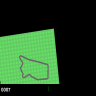

In [94]:
state

In [91]:
print(state.shape)
plt.imshow(state, interpolation='nearest')
plt.show()

AttributeError: 'CNN_DQN_Agent' object has no attribute 'shape'